In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [6]:
datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20201012", "06_Pressure.parquet.gzip")

data = pd.read_parquet(datafile_path)
data /= 100

data.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,677.330566,677.200928,677.069214,676.935364,676.799561,676.661621,676.521851,676.380249,676.236816,676.091614,...,678.499146,678.393433,678.285095,678.174194,678.060852,677.945068,677.826782,677.706177,677.583252,677.458069
-88.3125,690.025146,689.575867,689.095215,688.521790,687.944275,687.362976,686.778137,686.189819,685.598450,685.004150,...,693.535461,693.236572,692.932007,692.621948,692.306396,691.985535,691.659546,691.328430,690.914124,690.471313
-87.1875,694.171936,693.426636,692.679688,691.931335,691.181946,690.472046,689.822998,689.171936,688.519226,687.865173,...,701.879822,701.076477,700.267029,699.451660,698.630798,697.863647,697.130859,696.395081,695.656433,694.915283
-86.0625,696.060303,695.250732,694.439148,693.625916,692.811462,691.996033,691.153442,690.250061,689.345947,688.611328,...,705.730530,704.127258,702.948120,701.768188,700.859985,700.068542,699.273193,698.474365,697.672424,696.867676
-84.9375,700.200684,699.162598,698.525696,697.876770,697.216064,696.543823,695.860229,695.165527,694.460144,693.744324,...,713.551697,712.236145,710.901184,709.547119,708.174622,706.784119,705.376160,703.951355,702.510071,701.328857


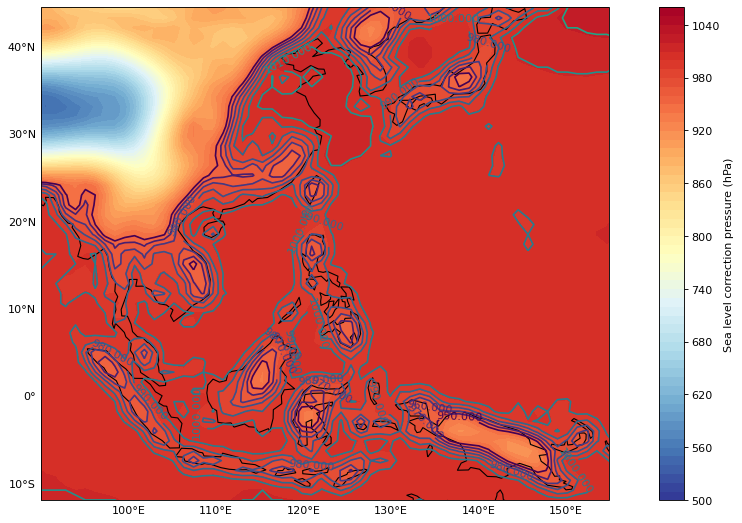

In [24]:
grid_mesh = np.meshgrid(data.columns.astype(np.float32).to_numpy(), data.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

clevs = np.arange(500, 1070, 10)
cmap = cm.RdYlBu_r
norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, data, clevs, cmap=cmap)
cbar = plt.colorbar(cs, orientation="vertical")

# Show contour line only larger than 900 hPa
masked_data = np.where(data > 900, data, 0)
contour = ax.contour(x_grid, y_grid, masked_data.astype(int), levels=np.arange(950, 1071, 10))
ax.clabel(contour, inline=True, fontsize=10)



# Fig Info
cbar.set_label("Sea level correction pressure (hPa)")

plt.show()
plt.close()

In [23]:
masked_data = np.where(data > 900, data, 0)
masked_data.astype(int)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [1018, 1017, 1017, ..., 1018, 1018, 1018],
       [1017, 1017, 1017, ..., 1017, 1017, 1017],
       [1016, 1016, 1016, ..., 1016, 1016, 1016]])